In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from plot_config import *

In [3]:
rerun_mean_std = False
if rerun_mean_std:
    for time_slice in [slice(1824,None,-1),slice(None,None,-1)]:

        particle_path = '/sciserver/filedb08-01/ocean/wenrui_temp/particle_file/saltyM/'
        pre = 'lineplotprep/salty_'
        # particle_path = '/sciserver/filedb11-01/ocean/wenrui_temp/particle_file/holliday/'
        table_path = particle_path+'table/'
        map_path = particle_path+'maps/'
        maps = xr.open_zarr(map_path)
        table= xr.open_zarr(table_path)
        
        cum = table.isel(time = time_slice).cumsum(dim = 'time')
        
        size = len(cum.time)
        
        mean = cum.mean(dim = 'space')
        std = cum.std(dim = 'space')
        
        for var in mean.data_vars:
            mean[var] = mean[var].chunk(size)
            # if var in ['sl','sf']:
            #     mean['var'] = table.isel(time = time_slice).mean(dim = 'space').chunk(size)
        for var in std.data_vars:
            std[var] = std[var].chunk(size)
        
        mean.to_zarr(pre+'mean'+str(time_slice),mode = 'w')
        std.to_zarr(pre+'std'+str(time_slice),mode = 'w')
        
        
        
        
        
        particle_path = '/sciserver/filedb04-01/ocean/wenrui_temp/particle_file/freshM/'
        pre = 'lineplotprep/fresh_'
        # particle_path = '/sciserver/filedb11-01/ocean/wenrui_temp/particle_file/holliday/'
        table_path = particle_path+'table/'
        map_path = particle_path+'maps/'
        maps = xr.open_zarr(map_path)
        table= xr.open_zarr(table_path)
        
        cum = table.isel(time = time_slice).cumsum(dim = 'time')
        
        size = len(cum.time)
        
        mean = cum.mean(dim = 'space')
        std = cum.std(dim = 'space')
        
        for var in mean.data_vars:
            mean[var] = mean[var].chunk(size)
            # if var in ['sl','sf']:
            #     mean['var'] = table.isel(time = time_slice).mean(dim = 'space').chunk(size)
        for var in std.data_vars:
            std[var] = std[var].chunk(size)

        mean.to_zarr(pre+'mean'+str(time_slice),mode = 'w')
        std.to_zarr(pre+'std'+str(time_slice),mode = 'w')

# Let the plotting begin

In [4]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)

In [5]:
meta = [
    ('fresh','five','figure1(b).png'),
    ('salty','five','figure4(b).png'),
    ('fresh','ten','sup_figure1(a).png'),
    ('salty','ten','sup_figure1(b).png'),
]

e_ua
E
dif_h
dif_v
A
I
F
e_ua
E
dif_h
dif_v
A
I
F
e_ua
E
dif_h
dif_v
A
I
F
e_ua
E
dif_h
dif_v
A
I
F


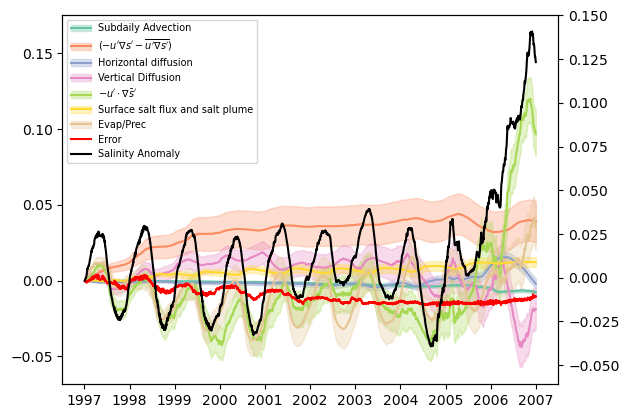

In [6]:
# case = 'salty'
# duration = 'five'
# save_as = 'figure4(b).png'
for case, duration, save_as in meta:

    plt.clf()
    pre = 'lineplotprep/'+case+'_'
    if duration == 'five':
        time_slice = slice(1824,None,-1)
    elif duration == 'ten':
        time_slice = slice(None,None,-1)
    else:
        raise ValueError('duration not precalculated')
    str_slc = str(time_slice)
    
    if case == 'salty':
        TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_salty,NUMBER_OF_PARTICLE_salty,VOLUME_EACH_salty,salty_idate
    if case == 'fresh':
        TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_fresh,NUMBER_OF_PARTICLE_fresh,VOLUME_EACH_fresh,fresh_idate
    mean = xr.open_zarr(pre+'mean'+str_slc)
    std = xr.open_zarr(pre+'std'+str_slc)
    xtime = rtime[idate:idate-len(mean.time):-1]
    
    ax = plt.axes()
    handles = []
    labels = []
    for var in rhs_list:
        print(var)
        a_mean = -mean[var][::-1]
        a_std = 10*std[var][::-1]/np.sqrt(NUMBER_OF_PARTICLE-1)
        mean_line, = ax.plot(xtime, a_mean, label=term_dic[var], color=color_dic[var])
        spread_area = ax.fill_between(xtime, a_mean - a_std, a_mean + a_std, alpha=0.3, label=term_dic[var], color=color_dic[var])
        handles.append((mean_line, spread_area))
        labels.append(term_dic[var])
    mean['tot'] = (mean['A']+mean['e_ua']+mean['E']+mean['dif_h']+mean['dif_v']+mean['I']+mean['F'])
    offset = float(mean['sf'][0])
    salt = np.diff(np.array([0]+list(mean['sl'].data)))
    to_explain = salt - offset
    error = to_explain + mean['tot']
    mean_line, = ax.plot(xtime, error[::-1], color=error_color)
    handles.append(mean_line)
    labels.append('Error')
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim()[0] + offset, ax.get_ylim()[1] + offset)
    salt_line, = ax.plot(xtime, salt[::-1]-offset,color = 'k')
    handles.append(salt_line)
    labels.append('Salinity Anomaly')
    ax.legend(handles,labels,fontsize = 7,loc = 0)
    if save_as:
        plt.savefig(save_as,dpi = dpi)